In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
from tqdm import tqdm

In [2]:
tf.__version__

'1.9.0'

In [3]:
#Read the input data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Training image shape (55000, 784)
Training labels shape (55000, 10)
Shape of an image (1, 784)


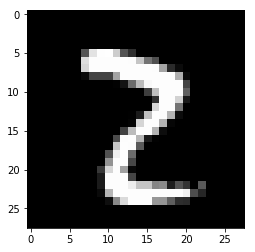

In [4]:
#Explore the data
sample_image = mnist.train.next_batch(1)[0]
print("Training image shape", mnist.train.images.shape)
print("Training labels shape", mnist.train.labels.shape)
print("Shape of an image", sample_image.shape)
sample_image = sample_image.reshape([28, 28])
plt.imshow(sample_image, cmap = "gray")

In [5]:
# Set para
image_size = 28
labels_size = 10
learning_rate = 0.05
steps_number = 1000
batch_size = 100

In [6]:
# Create placeholders
x = tf.placeholder(tf.float32, shape = [None,784])
y_ = tf.placeholder(tf.float32, shape = [None, 10])

In [7]:
# Functions for weights
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# Function for bias
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Functions for convolution with stride = 1 and padding = 0
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

# Function for max pooling over 2*2 blocks
def max_pooling_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [8]:
# The architecture is similar to https://www.tensorflow.org/get_started/mnist/pros

# Input layer where single input image shape is (1,784)
x_image = tf.reshape(x, [-1,28,28,1])

# Convolution layer 1 - 32 x 5 x 5 
# Conv -> BatchNorm -> Relu -> Max_pool
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_conv1 = conv2d(x_image, W_conv1) + b_conv1
y1 = tf.nn.relu(tf.layers.batch_normalization(x_conv1))
x_pool1 = max_pooling_2x2(y1)

# Conv layer 2 - 64 x 5 x 5
# Conv -> BatchNorm -> Relu -> Max_pool
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
x_conv2 = conv2d(x_pool1, W_conv2) + b_conv2
y2 = tf.nn.relu(tf.layers.batch_normalization(x_conv2))
x_pool2 = max_pooling_2x2(y2)

# Flatten 
x_flat = tf.reshape(x_pool2, [-1, 7 * 7 * 64])

# Dense fully connected layer
W_fc1 = weight_variable([7 * 7 * 64, 1024]) # max pooling reduced image to 7x7
b_fc1 = bias_variable([1024])
x_fc1 = tf.nn.relu(tf.layers.batch_normalization(tf.matmul(x_flat, W_fc1) + b_fc1))

# Dropout
keep_prob = tf.placeholder(tf.float32)
x_fc1_drop = tf.nn.dropout(x_fc1, keep_prob)

# Classification layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(x_fc1_drop, W_fc2) + b_fc2

In [9]:
# Probabilities output from model
y = tf.nn.softmax(y_conv)

# Loss and Adam optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [10]:
# Test accuracy of model
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

## 训练模型

In [12]:
# Train model
for i in tqdm(range(1000)):
    batch = mnist.train.next_batch(100)
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))

    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.4})

  0%|                                                 | 0/1000 [00:00<?, ?it/s]

Epoch 0, training accuracy 0.07


 20%|███████▊                               | 200/1000 [00:27<01:09, 11.56it/s]

Epoch 200, training accuracy 0.9


 40%|███████████████▌                       | 400/1000 [00:45<00:54, 10.94it/s]

Epoch 400, training accuracy 0.96


 60%|███████████████████████▍               | 600/1000 [01:03<00:36, 10.88it/s]

Epoch 600, training accuracy 0.93


 80%|███████████████████████████████▏       | 800/1000 [01:22<00:17, 11.35it/s]

Epoch 800, training accuracy 0.97


100%|██████████████████████████████████████| 1000/1000 [01:39<00:00, 11.46it/s]


In [15]:
print(train_accuracy)
print((mnist.test.labels[:,2]))
#Save model
saver = tf.train.Saver()
saver.save(sess, "./classifier")

0.98
[0. 1. 0. ... 0. 0. 0.]


'./classifier'

# non-targeted attack

在测试集上计算准确率

In [12]:
# load the data of the trained model
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('./'))

INFO:tensorflow:Restoring parameters from ./classifier


In [12]:
print("Test image shape", mnist.test.images.shape)

Test image shape (10000, 784)


In [18]:
# 内存太小，直接放整个测试集会爆炸，所以只能分batch来
test_accuracy = 0
for i in range(100):
    batch = mnist.test.next_batch(100)
    test_accuracy += accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
print("test accuracy %g"%(test_accuracy / 100))

test accuracy 0.9646


In [14]:
img_gradient = tf.gradients(cross_entropy, x)[0]

In [34]:
test_accuracy = 0
for i in range(100):
    batch = mnist.test.next_batch(100)
    batch = list(batch)
    gradient = img_gradient.eval({x: batch[0], y_: batch[1], keep_prob: 1.0})
    batch[0] = batch[0] + 0.02 * np.sign(gradient)
    test_accuracy += accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
#     print("Batch %d: test accuracy %g" % (i + 1, test_accuracy / (i + 1)))
print("total test accuracy %g"%(test_accuracy / 100))

total test accuracy 0.8929


## 抽取样本说明问题

In [19]:
# Fetch 10 2's images
index_mask = np.where(mnist.test.labels[:, 2])[0]
print(index_mask)
subset_mask = np.random.choice(index_mask, 10)
print(subset_mask)

[   0   19   25 ... 9991 9993 9995]
[5424  321 6031 9143  260 1273 9405 7269 1480 1855]


In [20]:
# Display the labels of the selected images
original_images = mnist.test.images[subset_mask]
original_labels = mnist.test.labels[subset_mask]
original_labels

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
# Predict the model on the selected 10 2's samples
prediction = tf.argmax(y,1)
prediction_val = prediction.eval(feed_dict={x: original_images, keep_prob: 1.0}, session=sess)
print("predictions", prediction_val)
probabilities = tf.reduce_max(y,1)
probabilities_val = probabilities.eval(feed_dict={x: original_images, keep_prob: 1.0}, session=sess)
print ("probabilities", probabilities_val)

predictions [2 2 2 2 2 2 2 2 2 2]
probabilities [0.95447206 0.99959177 0.99960953 0.9997993  0.9995198  0.98386407
 0.9984635  0.9992779  0.9800933  0.9996377 ]


Correct label 2
Predicted label: 2
Confidence: 0.95447206


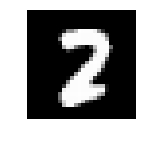

Correct label 2
Predicted label: 2
Confidence: 0.99959177


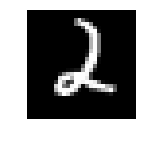

Correct label 2
Predicted label: 2
Confidence: 0.99960953


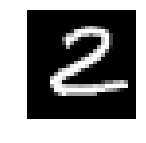

Correct label 2
Predicted label: 2
Confidence: 0.9997993


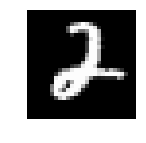

Correct label 2
Predicted label: 2
Confidence: 0.9995198


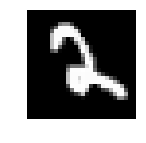

Correct label 2
Predicted label: 2
Confidence: 0.98386407


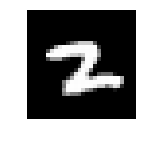

Correct label 2
Predicted label: 2
Confidence: 0.9984635


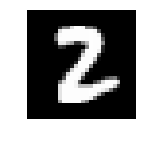

Correct label 2
Predicted label: 2
Confidence: 0.9992779


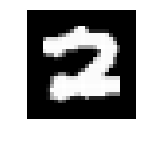

Correct label 2
Predicted label: 2
Confidence: 0.9800933


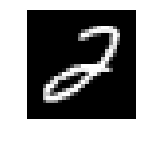

Correct label 2
Predicted label: 2
Confidence: 0.9996377


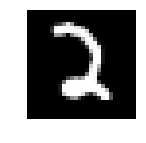

In [22]:
# Show the original images, correct, predicted label and confidence
for i in range(0, 10):
    print('Correct label', np.argmax(original_labels[i]))
    print('Predicted label:', prediction_val[i])
    print('Confidence:', np.max(probabilities_val[i]))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(original_images[i].reshape([28, 28]),cmap = "gray")
    plt.show()

In [23]:
img_gradient = tf.gradients(cross_entropy, x)[0]

In [31]:
steps = 10
step_size = 0.02

In [32]:
adversarial_img = original_images.copy()
adv_img_hist = list() # store adv_img
for i in range(0, steps):
    gradient = img_gradient.eval({x: adversarial_img, y_: original_labels, keep_prob: 1.0})
    # Update using sign of gradient
    adversarial_img = adversarial_img + step_size * np.sign(gradient)
    adv_img_hist.append(adversarial_img)
    prediction = tf.argmax(y,1)
    prediction_val = prediction.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print("predictions", prediction_val)
#     probabilities = tf.reduce_max(y, 1)
#     probabilities_val = probabilities.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
#     print('Confidence 2:', probabilities_val[:, 2])
#     print('Confidence 6:', probabilities_val[:, 6])

predictions [2 2 2 2 2 2 2 2 2 2]
predictions [7 2 2 2 2 7 2 2 2 2]
predictions [7 2 2 2 2 7 3 2 8 2]
predictions [7 1 3 2 2 7 3 0 8 3]
predictions [7 1 3 3 3 7 3 0 8 3]
predictions [7 1 3 3 3 7 3 0 8 3]
predictions [7 1 3 3 3 7 3 0 8 3]
predictions [7 1 3 3 3 7 3 0 8 3]
predictions [7 1 3 3 3 7 3 0 8 3]
predictions [7 1 3 3 3 7 3 0 8 3]


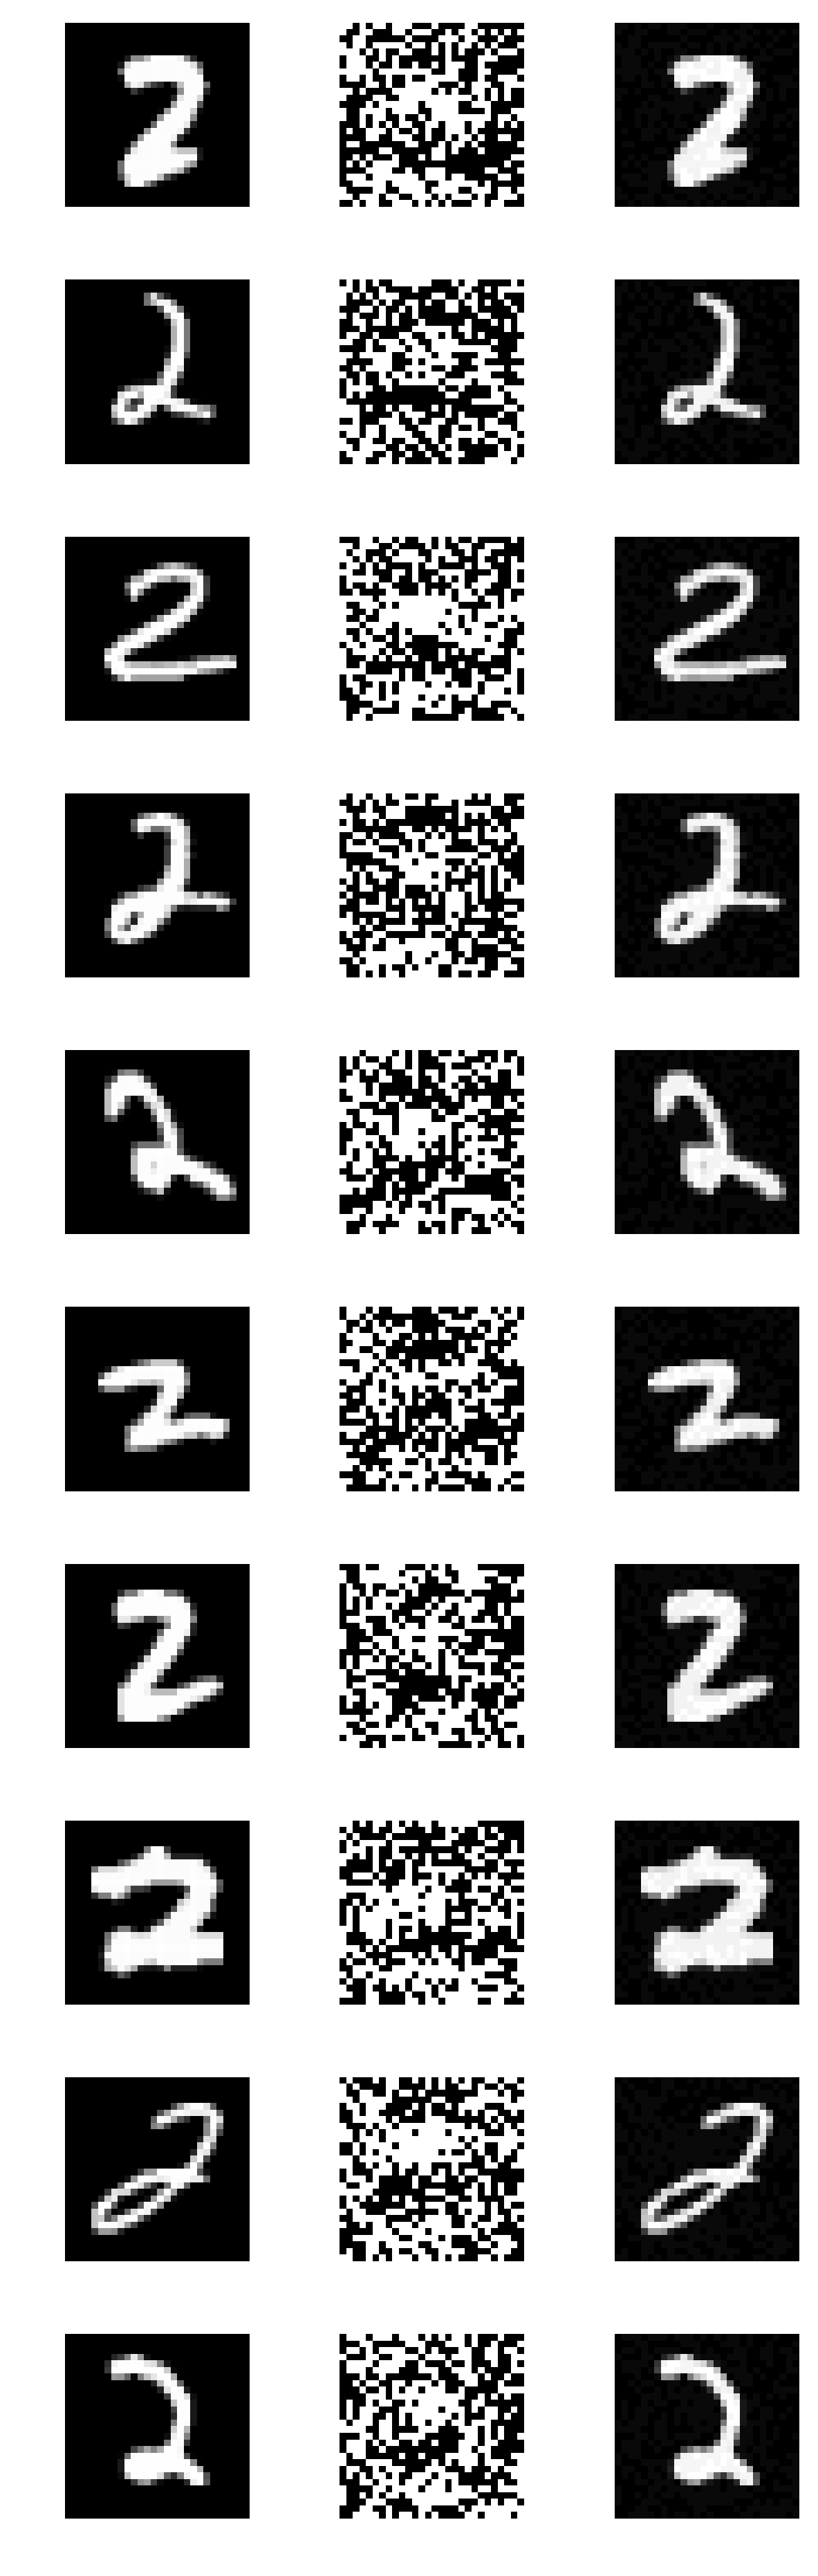

In [33]:
# Generate the image of 10 samples with original_image, delta and adversarial image
f, axarr = plt.subplots(10, 3, figsize=(5,15))
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
for i in range(10):
    axarr[i,0].set_axis_off()
    axarr[i,1].set_axis_off()
    axarr[i,2].set_axis_off()
    axarr[i,0].imshow(original_images[i].reshape([28, 28]), cmap = "gray")
    axarr[i,1].imshow((adv_img_hist[0][i] - original_images[i]).reshape([28, 28]), cmap = "gray")
    axarr[i,2].imshow((adv_img_hist[0][i]).reshape([28, 28]), cmap="gray")
    
plt.tight_layout()
plt.show()
f.savefig("result.png")

# targeted attack

In [44]:
# Set the target label as 6
target_number = 6
target_labels = np.zeros(original_labels.shape)
target_labels[:, target_number] = 1

In [45]:
target_labels

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [46]:
img_gradient = tf.gradients(cross_entropy, x)[0]

In [47]:
step_size = 0.5 #The amount to wiggle towards the gradient of target class.
steps = 10

### 直接用梯度本身去更新

In [48]:
# Targeted attack using Fast gradient sign method inspired from http://blog.ycombinator.com/how-adversarial-attacks-work/
# and http://karpathy.github.io/2015/03/30/breaking-convnets/
adversarial_img = original_images.copy()
for i in range(0, steps):
    gradient = img_gradient.eval({x: adversarial_img, y_: target_labels, keep_prob: 1.0})
    #Update using value of gradient
    adversarial_img = adversarial_img - step_size * gradient
    prediction = tf.argmax(y,1)
    prediction_val = prediction.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print("predictions", prediction_val)
    probabilities = y
    probabilities_val = probabilities.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print('Confidence 2:', probabilities_val[:, 2])
    print('Confidence 6:', probabilities_val[:, 6])

predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.9898857  0.59124327 0.99588    0.8596351  0.7022948  0.9999647
 0.98201466 0.8722939  0.89243245 0.9757975 ]
Confidence 6: [1.00002886e-04 4.91840008e-04 3.96790594e-04 1.17182103e-03
 2.68888136e-04 1.54251011e-05 4.67551799e-05 2.02040351e-03
 3.13422363e-03 1.48710897e-04]
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.96685344 0.5247128  0.98102564 0.75416404 0.606904   0.9996891
 0.9295734  0.69516915 0.7474966  0.9221834 ]
Confidence 6: [0.001525   0.00360555 0.00486421 0.00804628 0.00189158 0.00020736
 0.00045094 0.02240076 0.02107276 0.00111894]
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.91261417 0.48970097 0.9049194  0.62704223 0.5577492  0.99757546
 0.81385946 0.49948752 0.62782425 0.85412353]
Confidence 6: [0.01443359 0.0213898  0.0469939  0.03569652 0.00932434 0.00199781
 0.00305587 0.12537855 0.07524867 0.00621636]
predictions [2 2 2 2 2 2 2 6 2 2]
Confidence 2: [0.7922623  0.4506029  0.62725407 0.49644542 0.46

### 沿梯度方向更新，并减小步长

In [49]:
step_size = 0.02
steps = 10

In [50]:
adversarial_img = original_images.copy()
adv_img_hist = list()
prob2_hist = list()
prob6_hist = list()
for i in range(0, steps):
    gradient = img_gradient.eval({x: adversarial_img, y_: target_labels, keep_prob: 1.0})
    # Update using sign of gradient and decreasing the step size
    adversarial_img = adversarial_img - step_size * np.sign(gradient)
    adv_img_hist.append(adversarial_img)
    prediction = tf.argmax(y,1)
    prediction_val = prediction.eval(feed_dict={x: adversarial_img, keep_prob: 1.0}, session=sess)
    print("predictions", prediction_val)
    probabilities = y
    probabilities_val = probabilities.eval(feed_dict = {x: adversarial_img, keep_prob: 1.0}, session=sess)
    print('Confidence 2:', probabilities_val[:, 2])
    print('Confidence 6:', probabilities_val[:, 6])
prob2_hist.append(probabilities_val[:,2])
prob6_hist.append(probabilities_val[:,6])

predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.99008805 0.5434655  0.9970156  0.85077506 0.69945735 0.99996996
 0.98170704 0.89877504 0.8928138  0.9748659 ]
Confidence 6: [7.5326228e-05 5.9016643e-04 2.5767359e-04 1.2334306e-03 2.6988966e-04
 1.4200710e-05 5.4045526e-05 1.6842985e-03 3.5233744e-03 1.6990161e-04]
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.96841025 0.5127301  0.9846414  0.72536343 0.5844853  0.99973744
 0.9337753  0.73780525 0.71472144 0.91430354]
Confidence 6: [0.00108819 0.0054602  0.00314735 0.00938127 0.00225097 0.00018565
 0.00064458 0.02082272 0.02875048 0.00158157]
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: [0.90826213 0.47783706 0.92650634 0.5601992  0.5321516  0.9976987
 0.8057617  0.54307455 0.5339756  0.81927735]
Confidence 6: [0.01138593 0.04121407 0.03310587 0.06156611 0.01581372 0.00197644
 0.00535768 0.14881939 0.14854696 0.01212406]
predictions [2 2 2 2 2 2 2 6 6 2]
Confidence 2: [0.77734655 0.4006138  0.70082635 0.35030842 0.44338536 0.9

In [51]:
print("Probability of 2 in selected samples ",prob2_hist)
print("Probability of 6 in selected samples ",prob6_hist)

Probability of 2 in selected samples  [array([2.9478665e-04, 3.3280329e-04, 1.2223786e-04, 1.8597423e-04,
       1.0616794e-03, 1.6192573e-03, 4.9834638e-03, 3.6334401e-05,
       6.5660087e-04, 1.0483186e-03], dtype=float32)]
Probability of 6 in selected samples  [array([0.9993693 , 0.99931204, 0.99968696, 0.99935025, 0.9959214 ,
       0.9977787 , 0.98464245, 0.9998821 , 0.9982185 , 0.99783546],
      dtype=float32)]


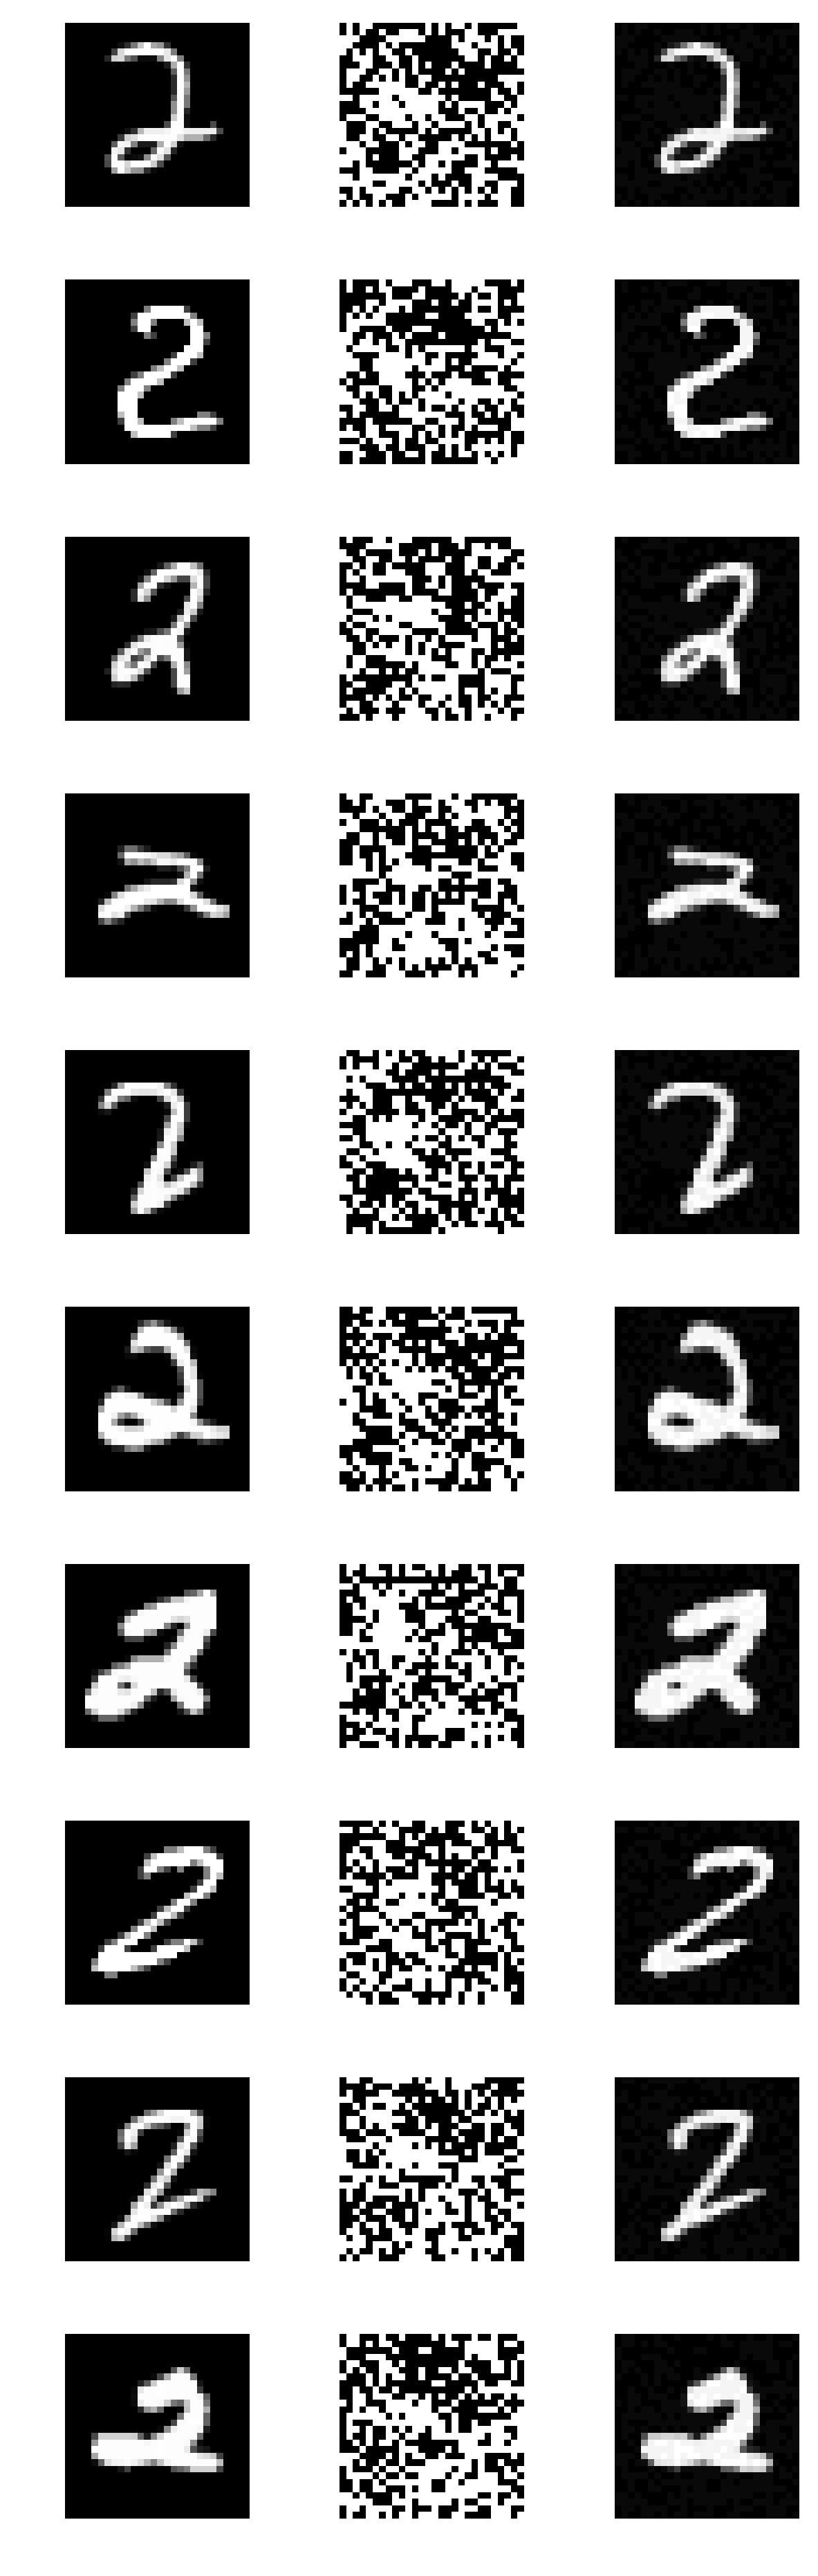

In [52]:
# Generate the image of 10 samples with original_image, delta and adversarial image
f, axarr = plt.subplots(10, 3, figsize=(5,15))
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
for i in range(10):
    axarr[i,0].set_axis_off()
    axarr[i,1].set_axis_off()
    axarr[i,2].set_axis_off()
    axarr[i,0].imshow(original_images[i].reshape([28, 28]), cmap = "gray")
    axarr[i,1].imshow((adv_img_hist[0][i] - original_images[i]).reshape([28, 28]), cmap = "gray")
    axarr[i,2].imshow((adv_img_hist[0][i]).reshape([28, 28]), cmap="gray")
    
plt.tight_layout()
plt.show()
f.savefig("result.png")

# 生成并保存对抗样本

In [53]:
import numpy as np

In [59]:
# 生成测试集上的对抗样本
test_img = []
test_lab = []
test_adv = []
for i in tqdm(range(100)):
    batch_x, batch_y = mnist.test.next_batch(100)
    gradient = img_gradient.eval({x: batch_x, y_: batch_y, keep_prob: 1.0})
    batch_x_noise = batch_x + 0.02 * np.sign(gradient)
    test_img.append(batch_x)
    test_lab.append(batch_y)
    test_adv.append(batch_x_noise)
test_img = np.array(test_img)
test_lab = np.array(test_lab)
test_adv = np.array(test_adv)
np.save('test_img.npy', test_img)
np.save('test_lab.npy', test_lab)
np.save('test_adv.npy', test_adv)

100%|████████████████████████████████████████| 100/100 [01:04<00:00,  1.57it/s]


In [60]:
# 生成训练集上的对抗样本
train_img = []
train_lab = []
train_adv = []
for i in tqdm(range(550)):
    batch_x, batch_y = mnist.train.next_batch(100)
    gradient = img_gradient.eval({x: batch_x, y_: batch_y, keep_prob: 1.0})
    batch_x_noise = batch_x + 0.02 * np.sign(gradient)
    train_img.append(batch_x)
    train_lab.append(batch_y)
    train_adv.append(batch_x_noise)
train_img = np.array(train_img)
train_lab = np.array(train_lab)
train_adv = np.array(train_adv)
np.save('train_img.npy', train_img)
np.save('train_lab.npy', train_lab)
np.save('train_adv.npy', train_adv)

100%|████████████████████████████████████████| 550/550 [05:29<00:00,  1.49it/s]


# 测试去噪效果

In [24]:
de_x_noise = np.load('test_de.npy')
test_lab = np.load('test_lab.npy')

In [25]:
print(de_x_noise.shape)
print(test_lab.shape)

(100, 100, 784)
(100, 100, 10)


In [26]:
test_accuracy = 0
for i in range(100):
    batch_x = de_x_noise[i].reshape(-1, 784)
    batch_y = test_lab[i].reshape(-1, 10)
    test_accuracy += accuracy.eval(feed_dict={x:batch_x, y_: batch_y, keep_prob: 1.0})
#     print("Batch %d: test accuracy %g" % (i + 1, test_accuracy / (i + 1)))
print("total test accuracy %g"%(test_accuracy / 100))

total test accuracy 0.9398
